# Importing the required libraries

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset

In [27]:
IceCream = pd.read_csv('IceCreamData.csv')

In [28]:
IceCream.head(10)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
5,14.352514,367.940744
6,13.707780,308.894518
7,30.833985,696.716640
8,0.976870,55.390338
9,31.669465,737.800824


In [29]:
IceCream.tail(5)

,Temperature,Revenue
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [30]:
IceCream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [31]:
IceCream.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


# Visualize Dataset

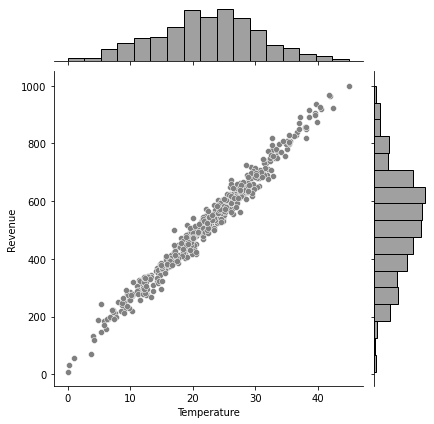

In [32]:
sns.jointplot(x = 'Temperature', y = 'Revenue', data = IceCream, color = 'grey')

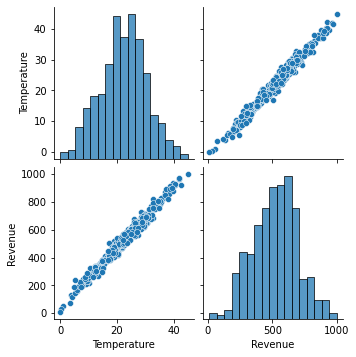

In [33]:
sns.pairplot(IceCream)

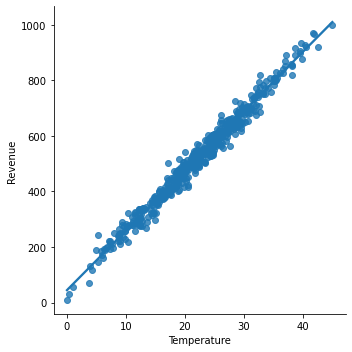

In [34]:
sns.lmplot(x='Temperature',y='Revenue',data=IceCream)

# Divide the dataset into train and test datasets

In [35]:
from sklearn.model_selection import train_test_split
X = IceCream[['Temperature']]
y = IceCream['Revenue']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
X_train.shape

(400, 1)

In [38]:
y_train.shape

(400,)

In [39]:
X_test.shape

(100, 1)

In [40]:
y_test.shape

(100,)

# Train the model

In [41]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept=True)
regressor.fit(X_train,y_train)

LinearRegression()

In [42]:
print(f"Linear model coefficient m is {regressor.coef_}")
print(f"Linear model coefficient b is {regressor.intercept_}")

Linear model coefficient m is [21.38197386]
Linear model coefficient b is 46.80464127742357


Text(0.5, 1.0, 'Revenue in dollars vs Temperature in DegC for training dataset')

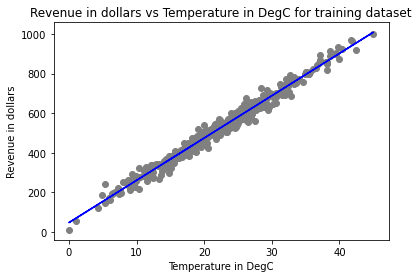

In [43]:
plt.scatter(X_train,y_train,color='gray')
plt.plot(np.array(X_train),regressor.predict(X_train),color='blue')
plt.xlabel('Temperature in DegC')
plt.ylabel('Revenue in dollars')
plt.title('Revenue in dollars vs Temperature in DegC for training dataset')

# Test the model

In [44]:
y_predict = regressor.predict(X_test)

In [45]:
type(y_predict)
type(X_test)

pandas.core.frame.DataFrame

Text(0.5, 1.0, 'Revenue in dollars vs Temperature in DegC for test dataset')

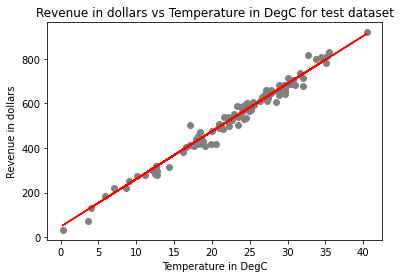

In [46]:
plt.scatter(X_test,y_test,color='gray')
plt.plot(np.array(X_test),y_predict,color='red')
plt.xlabel('Temperature in DegC')
plt.ylabel('Revenue in dollars')
plt.title('Revenue in dollars vs Temperature in DegC for test dataset')

In [47]:
T = [[38]]
regressor.predict(T)

C:\Users\Vadiraj R Adabaddi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859.31964778])

# Model Valuation

In [48]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score

In [49]:
n = len(X_test)
k = X_test.shape[1]

In [50]:
MAE = mean_absolute_error(y_test,y_predict)
MAPE = mean_absolute_percentage_error(y_test,y_predict)
MSE = mean_squared_error(y_test,y_predict)
RMSE = np.sqrt(MSE)
r2 = r2_score(y_test,y_predict)
adj_r2 = 1 - ((n-1)*(1-r2)/(n-k-1))

In [51]:
print('MAE=',MAE,'\nMAPE=',MAPE,'\nMSE=',MSE,'\nRMSE=',RMSE,'\nr2=',r2,'\nadj_r2=',adj_r2)

MAE= 19.18454740837043 
MAPE= 0.05086538627070505 
MSE= 652.520061297973 
RMSE= 25.5444722258647 
r2= 0.9771532792713993 
adj_r2= 0.9769201494680462
